In [1]:
simulations1 = '../out/associations/power_analysis.tsv'
simulations2 = '../out/refseq/power_analysis.tsv'

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=11)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=12, titlesize=12)
plt.rc('legend', fontsize=11)

In [3]:
import numpy as np
import pandas as pd

In [4]:
r = pd.read_table(simulations1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [5]:
t = (r.groupby(['size', 'OR', 'og']).sum()['pass'] / r.groupby(['size', 'OR', 'og']).count()['pass']).reset_index()

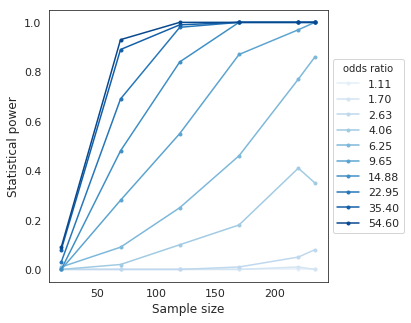

In [6]:
plt.figure(figsize=(5, 5))

x = t[t['og'] == 'pks2']
with sns.color_palette('Blues', x['OR'].unique().shape[0]):
    for OR in x['OR'].unique():
        plt.plot(x[x['OR'] == OR]['size'],
                 x[x['OR'] == OR]['pass'],
                 '.-',
                 label='%.2f' % OR)

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='odds ratio',
           frameon=True)
plt.xlabel('Sample size')
plt.ylabel('Statistical power')

plt.savefig('simulation1.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('simulation1.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

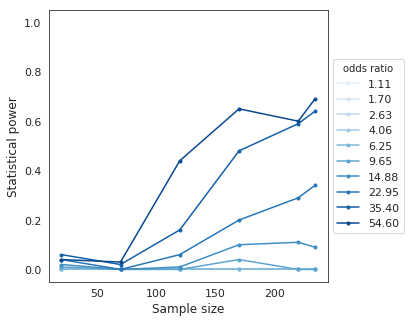

In [7]:
plt.figure(figsize=(5, 5))

x = t[t['og'] == 'group_2650']
with sns.color_palette('Blues', x['OR'].unique().shape[0]):
    for OR in x['OR'].unique():
        plt.plot(x[x['OR'] == OR]['size'],
                 x[x['OR'] == OR]['pass'],
                 '.-',
                 label='%.2f' % OR)

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='odds ratio',
           frameon=True)
plt.xlabel('Sample size')
plt.ylabel('Statistical power')

plt.ylim(-0.05, 1.05)

plt.savefig('simulation2.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('simulation2.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [8]:
tsize = t['size'].max()

In [9]:
r = pd.read_table(simulations2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [10]:
t = (r.groupby(['size', 'OR', 'og']).sum()['pass'] / r.groupby(['size', 'OR', 'og']).count()['pass']).reset_index()

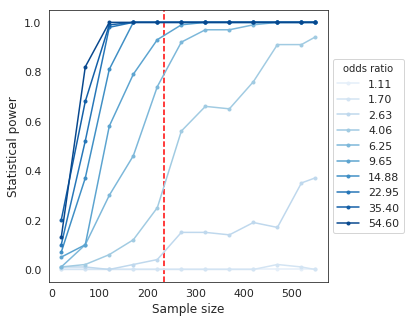

In [11]:
plt.figure(figsize=(5, 5))

x = t[t['og'] == 'group_7955']
with sns.color_palette('Blues', x['OR'].unique().shape[0]):
    for OR in x['OR'].unique():
        plt.plot(x[x['OR'] == OR]['size'],
                 x[x['OR'] == OR]['pass'],
                 '.-',
                 label='%.2f' % OR)

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='odds ratio',
           frameon=True)
plt.axvline(tsize,
            ls='dashed',
            color='r',
            zorder=0)
plt.xlabel('Sample size')
plt.ylabel('Statistical power')

plt.savefig('simulation3.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('simulation3.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

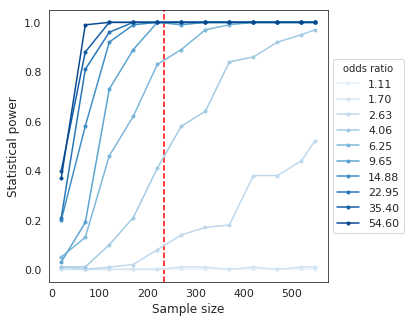

In [12]:
plt.figure(figsize=(5, 5))

x = t[t['og'] == 'fabG']
with sns.color_palette('Blues', x['OR'].unique().shape[0]):
    for OR in x['OR'].unique():
        plt.plot(x[x['OR'] == OR]['size'],
                 x[x['OR'] == OR]['pass'],
                 '.-',
                 label='%.2f' % OR)

plt.legend(loc='center left',
           bbox_to_anchor=(1, 0.5),
           title='odds ratio',
           frameon=True)
plt.axvline(tsize,
            ls='dashed',
            color='r',
            zorder=0)
plt.xlabel('Sample size')
plt.ylabel('Statistical power')

plt.savefig('simulation4.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('simulation4.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);